# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lats)
print(lngs)

[ 34.86516365 -36.66688633  89.55218129 ...  -8.54791597 -85.04000823
 -82.35432045]
[-167.65203823   60.25072886 -148.85985681 ...  -43.95936343 -178.27481954
   46.05254942]


In [55]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key_weather}&units={units}&q={city}&units={units}"

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 26.89,
        "lat": -33.59
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 67.17,
        "feels_like": 57.43,
        "temp_min": 67.17,
        "temp_max": 67.17,
        "pressure": 1008,
        "humidity": 72,
        "sea_level": 1008,
        "grnd_level": 1006
    },
    "visibility": 10000,
    "wind": {
        "speed": 21.72,
        "deg": 260
    },
    "clouds": {
        "all": 4
    },
    "dt": 1605324110,
    "sys": {
        "country": "ZA",
        "sunrise": 1605322913,
        "sunset": 1605372729
    },
    "timezone": 7200,
    "id": 964432,
    "name": "Port Alfred",
    "cod": 200
}


In [54]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key_weather

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
# Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | grand-santi
Processing Record 5 of Set 1 | neiafu
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | tromso
Processing Record 18 of Set 1 | paamiut
Processing Record 19 of Set 1 | durban
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | severo-kurilsk
Processing Record 23 of S

Processing Record 28 of Set 8 | guelengdeng
City not found. Skipping...
Processing Record 29 of Set 8 | porto santo
Processing Record 30 of Set 8 | agadir
Processing Record 31 of Set 8 | sorvag
City not found. Skipping...
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | paragominas
Processing Record 35 of Set 8 | aromashevo
Processing Record 36 of Set 8 | kaili
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | novopokrovka
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | ibaiti
Processing Record 41 of Set 8 | pacific grove
Processing Record 42 of Set 8 | simao
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | prisacani
Processing Record 45 of Set 8 | mahebourg
Processing Record 46 of Set 8 | haimen
Processing Record 47 of Set 8 | hay river
Processing Record 48 of Set 8 | mandiana
Processing Record 49 of Set 8 | ilulissat
Processing R

Processing Record 12 of Set 12 | mantsala
Processing Record 13 of Set 12 | turukhansk
Processing Record 14 of Set 12 | bolshaya dzhalga
Processing Record 15 of Set 12 | erzin
Processing Record 16 of Set 12 | maple creek
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | byron bay
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | makakilo city
Processing Record 21 of Set 12 | gizo
Processing Record 22 of Set 12 | jambusar
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | nanyuki
Processing Record 25 of Set 12 | taltal
Processing Record 26 of Set 12 | homer
Processing Record 27 of Set 12 | biri
Processing Record 28 of Set 12 | tanout
Processing Record 29 of Set 12 | kuche
City not found. Skipping...
Processing Record 30 of Set 12 | coralville
Processing Record 31 of Set 12 | tashla
Processing Record 32 of Set 12 | walvis bay
Processing Record 33 of Set 12 | isangel
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# build a data frame's titles
weather_dict = {
    "City": cities_list,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weather_dict)

# Display count
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [27]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nyurba,98,RU,1605322890,95,63.28,118.33,12.83,4.68
1,Ushuaia,40,AR,1605322651,70,-54.80,-68.30,42.80,28.86
2,Avarua,58,CK,1605322698,69,-21.21,-159.78,78.80,6.93
3,Marrakesh,40,MA,1605322891,82,31.63,-8.01,64.40,4.70
4,Payo,100,ID,1605322891,58,-3.75,103.64,90.66,1.79


In [28]:
weather_data.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

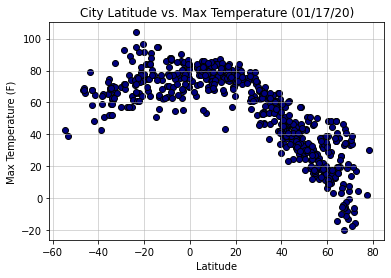

In [29]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "navy", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

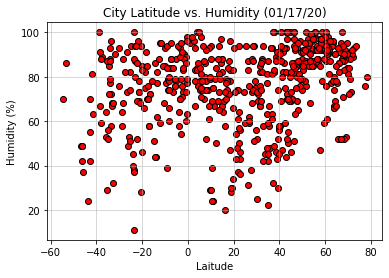

In [30]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Humidity Plot

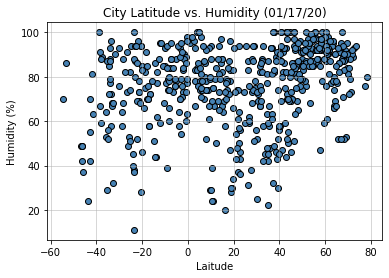

In [31]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

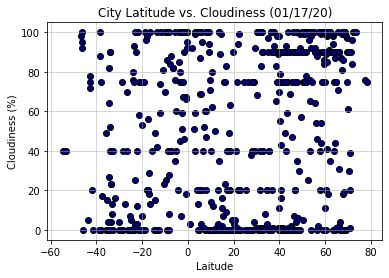

In [32]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "navy", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

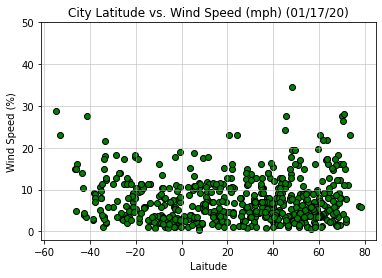

In [33]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [39]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_data.loc[weather_data["Lat"]>0]
Southern_hemisphere = weather_data.loc[weather_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8877409665609979


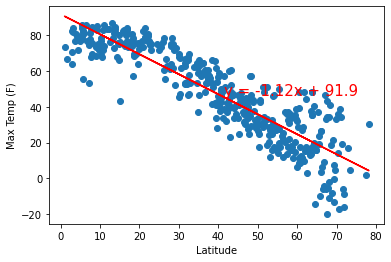

None


In [42]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45216109031259677


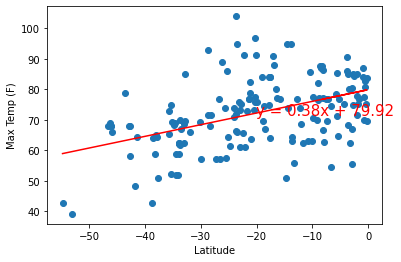

None


In [43]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3051679292069712


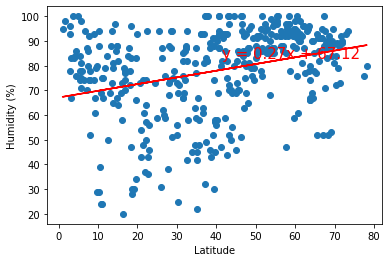

None


In [44]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2798773399360797


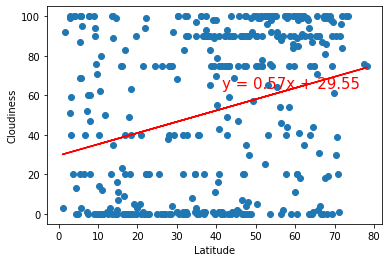

None


In [45]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11988417775509684


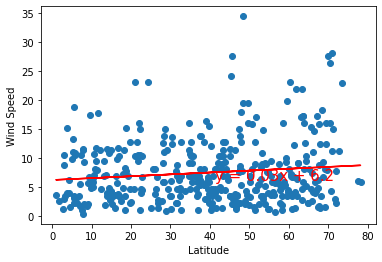

None


In [46]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.35730288939329824


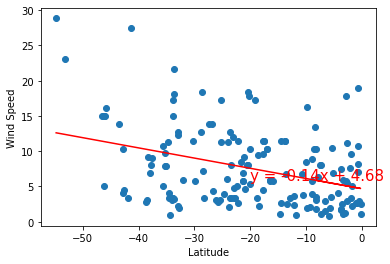

None


In [47]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11988417775509684


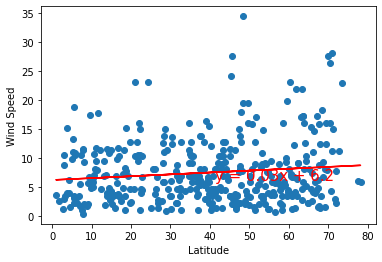

None


In [57]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.35730288939329824


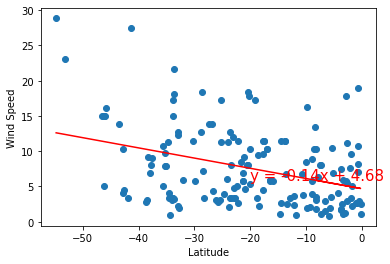

None


In [58]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))